<a href="https://colab.research.google.com/github/amyfthau/CFGSum23D1G4/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

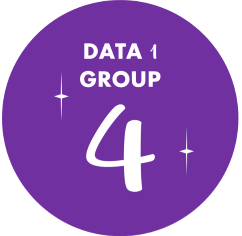

Hey guys! Just playing around to see how we will collab and code - Amy :)

Feel free to add to this - I want to see how it does version control with GitHub

To address:
(bold - complete/ italics - in progress)

1. **Handling Duplicates**
2. **Handling Missing Variables and Outliers**
3. **Data Transformations - replace, apply, map**
4. **Handling Categorical Data- encoding**
5. **Data Imputation**
6. **String Operations**
7. **Reshaping Data**
8. **DateTime Handling**
9. **Date Type Conversion**
10. **Type Conversion**
11. **Remove Spaces**
12. **Missing Data**
13. **Save Pandas to CSV**
14. **Data Collation - Pandas Dataframe**

# A) Docking, setting directory intalling packages etc

## i) Mounting colab files

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [172]:
# 1) Set files ready

# Import relevant libraries to mount drive
from google.colab import drive
import os

# Mount google drive
drive.mount('/content/drive')

# Define the path to your specific folder
specific_folder_path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4'

# Navigate to the specific folder
os.chdir(specific_folder_path)

# change directory to shared group folder
%cd /content/drive/MyDrive/CFGdegree_Sum23_D1_G4




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


## ii) Importing Libraries

In [173]:
import pandas as pd
import requests
import numpy as np
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


# B) Data cleaning and preprocessing functions

This code contains functions for cleaning and preprocessing data in Pandas DataFrames. The functions can be used to handle duplicates, missing values, outliers, and other data quality issues.

### Functions:

```remove_spaces()```: This function removes whitespaces from string columns in a Pandas DataFrame.

```count_duplicates_drop()```: This function counts and drops duplicate rows from a DataFrame.

```clean_missing_data()```: This function removes rows with missing data from a DataFrame for specified columns.

```check_unique_values():``` This function returns an array of unique values in a specified column of the DataFrame.

```value_count_series():``` This function creates a Pandas Series object containing value counts for each unique value in the specified column.

### Examples:
To use the functions, first import the cleaning_and_preprocessing module:
```
import cleaning_and_preprocessing as cp
```
Then, specify the DataFrame and the column(s) to process. For example, to remove whitespaces from all string columns in the DataFrame, you would use the following code:

```
df = pd.DataFrame()
df = cp.remove_spaces(df, column_wise=True)

```

In [174]:
# Functions

def remove_spaces (df, column_wise):
  """
  Function for removing whitespaces from string columns in a pandas DataFrame.

  #if we want to do it column-wise and not for the whole dataset remove the first line of the function and place column name in.

  Args:
    df (pandas.DataFrame): The input DataFrame.
    column_wise (bool): Whether to remove whitespaces column-wise (default is True).
    columns (list or None): List of columns to process. If None, all string columns are processed.

  Returns:
    pandas.DataFrame: The DataFrame with whitespaces removed.

  Note:
    If column_wise is False, provide the 'columns' parameter to specify columns to process.


  """
  if column_wise:
    # Iterate through each column in the DataFrame
    for col in df.columns:
      # Check if the column contains string data
      if df[col].dtype == 'object':
        # Remove leading and trailing whitespaces from string values in the column
        df[col] = df[col].str.strip()
  else:
    # If not processing column-wise, use specified columns or default to all string columns
    if columns is None:
      columns = [col for col in df.columns if df[col].dtype == 'object']
      # Iterate through specified columns
      for col in columns:
      # Remove leading and trailing whitespaces from string values in the specified column
        df[col] = df[col].str.strip()
  # Return the DataFrame with whitespaces now removed
  return df

def check_unique_values(column_name, df):
    """
    Returns an array of unique values in a specified column of the DataFrame.

    Args:
        column_name (str): The name of the column to check for unique values.
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        numpy.ndarray: An array containing the unique values in the specified column.
    """
    # Use the unique() function to obtain an array of unique values in the specified column
    unique_values = df[column_name].unique()
    return unique_values


def value_count_series(column_name, df):
    """
    Creates a Pandas Series object containing value counts for each unique value in the specified column.

    Args:
        column_name (str): The name of the column for which to calculate value counts.
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        pandas.Series: A Series object with indices representing unique values and values representing their counts.
    """
    # Use the value_counts() function to count occurrences of each unique value in the specified column
    value_counts = df[column_name].value_counts()
    return value_counts

def clean_missing_data(df, column_names):
    """
    Removes rows with missing data from the DataFrame for specified columns.

    Args:
        df (pandas.DataFrame): The DataFrame to clean.
        column_names (str or list): The name(s) of the column(s) to consider for missing data removal.

    Returns:
        pandas.DataFrame: A new DataFrame with rows containing missing data in the specified columns removed.
    """
    # If column_names is a string, convert it to a list to handle single column case
    if isinstance(column_names, str):
        column_names = [column_names]

    # Drop rows with missing data in the specified columns
    df_cleaned = df.dropna(subset=column_names)

    return df_cleaned

def count_duplicates_drop(df):
    """
    Counts and drops duplicate rows from the DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to check for duplicates and modify.

    Returns:
        None
    """

    # Count the number of duplicate rows in the DataFrame
    duplicates = df[df.duplicated()].shape[0]
    print('Duplicates Number:', duplicates)
    # Drop the duplicate rows from the DataFrame in-place
    df.drop_duplicates(inplace=True)
    # Check if there are still any duplicates remaining in the DataFrame
    print('Duplicates removed. Still any duplicates?', df.duplicated().any())


# Convert the index to datetime format
def convert_index_to_datetime(df):
    """
    Convert the index of a DataFrame to datetime format.

    Args:
        df (pandas.DataFrame): The DataFrame to convert the index of.

    Returns:
        pandas.DataFrame or None: The DataFrame with the index converted to datetime format,
                                 or None if an error occurs.
    """
    try:
      # Check if index of the DataFrame (df.index) is already in the datetime format (pd.DatetimeIndex).
        if not isinstance(df.index, pd.DatetimeIndex):
            df.index = pd.to_datetime(df.index)
            return df
        else:
            print("Index is already in datetime format.")
            return df
    # Handle Value Error
    except ValueError as ve:
        print("ValueError:", ve)
        return None
    # Generic error
    except Exception as e:
        print("An error occurred:", e)
        return None


"""
To address:

2. Handling Missing Variables and Outliers
3. Data Transformations - replace, apply, map
4. Handling Categorical Data- encoding
5. Data imputuation
6. String operations
7. Reshaping data
9. Date Type conversion
10. Type conversion
11. Remove Spaces
12. Missing Data
14. Data Collation - Pandas Dataframe
"""



'\nTo address:\n\n2. Handling Missing Variables and Outliers\n3. Data Transformations - replace, apply, map\n4. Handling Categorical Data- encoding\n5. Data imputuation\n6. String operations\n7. Reshaping data\n9. Date Type conversion\n10. Type conversion\n11. Remove Spaces\n12. Missing Data\n14. Data Collation - Pandas Dataframe\n'

## Saved Cleaned Data Functions

In [ ]:
# Initialise a list to store cleaned file names to keep track of what has been saved each session
cleaned_files_list = []

def save_clean_data(file_name, df, cleaned_files_list):
    """
    Function for saving a cleaned DataFrame to a CSV file

    Args:
        file_name (str): The base name of the CSV file
        ** note: you do not need to put .csv at the end of the file, this functions
        adds .csv at the end and the date at the start
        df (pd.DataFrame): The DataFrame to save.
        cleaned_files_list (list): List to store cleaned file names.

    Returns:
        CSV file
    """
    # Check if the DataFrame has an index
    index = isinstance(df.index, pd.Index)

    # Get the current date in YYYY-MM-DD format
    current_date = datetime.now().strftime('%Y-%m-%d')

    # Construct the output file name by appending current date and 'cleaned.csv' to the provided file_name
    output_file_name = '{}_{}_cleaned.csv'.format(current_date, file_name)

    # Save the DataFrame to the specified output file in CSV format
    df.to_csv(output_file_name, index=index)

    # Append the cleaned file name to the list
    cleaned_files_list.append(output_file_name)

    # Print success
    print(f"CSV file {output_file_name} saved")

    # Print the list of cleaned file names
    print("Cleaned Files:", cleaned_files_list)



# C) Import Data Around Depedent Variable/ Target/ Response Variable: House Prices (and their features)

This code retrieves specific data from a set of Excel and CSV files. The data is stored in Pandas DataFrames, and the description of each DataFrame is printed to the console.

### Functions:

```retrieve_specific_data():```This function retrieves a specific DataFrame based on the given name.

```extract_column_and_index():``` This function extracts a specific column from a DataFrame and sets it as the index.

### Usage
To use the code, first specify the name of the DataFrame you want to retrieve in the df_name variable. Then, call the retrieve_specific_data() function. The description of the retrieved DataFrame will be printed to the console.

To extract a specific column from a DataFrame and set it as the index, specify the name of the DataFrame and the column name in the df and column_name variables, respectively. Then, call the extract_column_and_index() function. The extracted column with the specified index will be returned.

### Examples
The following code retrieves the UKHPI2022 DataFrame and prints its description to the console:

```
df_name = "UKHPI2022"
UKHPI2022_df = retrieve_specific_data(df_name)
print(UKHPI2022_df.describe())
```

The following code extracts the AveragePrice column from the UKHPI2022 DataFrame and sets it as the index. The extracted column is then printed to the console:

```
column_name_to_extract = "AveragePrice"
averagehouseprices = extract_column_and_index(UKHPI2022_df, column_name_to_extract)
print(averagehouseprices.head())
```


### Notes

* The code requires the following Python libraries:
    * NumPy
    * Pandas
    * Matplotlib
* To install these libraries, you can use the following commands:
```
pip install numpy
pip install pandas
pip install matplotlib
```

In [ ]:
def retrieve_specific_data(df_name):
    """
    Retrieve a specific dataframe based on the given name.

    Args:
        df_name (str): The name of the dataframe to retrieve. Valid values are:
            - "WealthByEthnicity"
            - "HousingAffordability"
            - "HomeOwnership"
            - "UKHPI2022"
            - "PricePaidRecords"

    Returns:
        pd.DataFrame or None: The retrieved dataframe if a valid df_name is provided, else None.
    """
    # Define the range of rows to import (using header and skiprows)
    header_row = 3  # The row that contains the column headers
    skip_rows = 1   # The number of rows to skip after the header
    header_row2 = 3  # The row that contains the column headers

    # Specify the range of rows you want to keep
    end_row = 13
    end_row2 = 117

    # Define the column range to import (skip the first blank column)
    use_columns = "B:H"  # Specify the range of columns you want to import
    use_columns2 = "A:AA"

    # Create paths for each dataset
    householdwealthpath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/Household_Wealth_by_Ethnicity_GBR.xlsx'
    Housingaffordabilitypath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/Housing_Purchase_Affordability_Tables2022.xlsx'
    HomeOwnershippath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/home-ownership-spreadsheet.csv'
    UKHPI2022path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/UK-HPI-full-file-2022-01.csv'
    PricePaidRecordspath = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/price_paid_records.csv'

    # Read and convert into a dataframe object based on df_name
    if df_name == "WealthByEthnicity":
        df = pd.read_excel(householdwealthpath, sheet_name='Table 1', header=header_row, skiprows=skip_rows, usecols=use_columns)
        df = df.iloc[0:end_row]
    elif df_name == "HousingAffordability":
        df = pd.read_excel(Housingaffordabilitypath, sheet_name='1', header=header_row2, usecols=use_columns2)
        df = df.iloc[0:end_row2]
    elif df_name == "HomeOwnership":
        df = pd.read_csv(HomeOwnershippath, encoding='unicode_escape')
    elif df_name == "UKHPI2022":
        df = pd.read_csv(UKHPI2022path)
    elif df_name == "PricePaidRecords":
        df = pd.read_csv(PricePaidRecordspath)
    else:
        print("Invalid dataframe name specified.")
        return None  # Return None for invalid dataframe names

    # Print the description of the retrieved dataframe
    print(f"Description of {df_name} dataframe:")
    print(df.describe())
    print(df.head())

    return df

# Uncomment the required dataframes

# Call the function to retrieve the specific dataframe
df_to_retrieve = "UKHPI2022"  # Change this to the desired dataframe name
UKHPI2022_df = retrieve_specific_data(df_to_retrieve)
print(UKHPI2022_df.head())
print(UKHPI2022_df.columns)
# df_to_retrieve = "WealthByEthnicity"  # Change this to the desired dataframe name
# WealthByEthnicity_df = retrieve_specific_data(df_to_retrieve)
# df_to_retrieve = "HousingAffordability"  # Change this to the desired dataframe name
# HousingAffordability_df = retrieve_specific_data(df_to_retrieve)
# df_to_retrieve = "HomeOwnership"  # Change this to the desired dataframe name
# HomeOwnership_df = retrieve_specific_data(df_to_retrieve)
# df_to_retrieve = "PricePaidRecords"  # Change this to the desired dataframe name
# PricePaidRecords_df = retrieve_specific_data(df_to_retrieve)

def extract_column_and_index(df, column_name):
    """
    Extract a specific column from a dataframe and set it as the index.

    Args:
        df (pandas.DataFrame): The input dataframe.
        column_name (str): The name of the column to extract and use as index.

    Returns:
        pandas.Series: The extracted column with the specified index.
    """
    if column_name in df.columns:
        extracted_column = df[column_name]
        if df.columns[0] == 'Date':
            extracted_column.index = pd.to_datetime(df.iloc[:, 0])
            return extracted_column
        else:
            print("The first column is not recognized as 'Date'. Unable to set index.")
    else:
        print(f"Column '{column_name}' not found in the dataframe.")

# Call the function to extract and index a specific column
column_name_to_extract = "AveragePrice"  # Replace with the actual column name
averagehouseprices = extract_column_and_index(UKHPI2022_df, column_name_to_extract)
# print(averagehouseprices.head())
print(averagehouseprices.index)



Description of UKHPI2022 dataframe:
       AveragePrice          Index      IndexSA      1m%Change     12m%Change  \
count  1.352500e+05  135250.000000  4539.000000  134807.000000  130210.000000   
mean   1.663382e+05      80.502968    83.043165       0.574463       6.578408   
std    1.119901e+05      34.574135    31.764825       2.001996       8.967794   
min    2.712016e+03       1.096815    18.312610     -30.297781     -35.786566   
25%    9.331214e+04      46.401927    56.601615      -0.432478       1.453098   
50%    1.462071e+05      88.556950    89.887310       0.528818       5.551385   
75%    2.086069e+05     105.609288   105.917289       1.523309      10.791316   
max    1.479252e+06     221.485238   151.907012      35.286646      98.437940   

       AveragePriceSA    SalesVolume  DetachedPrice  DetachedIndex  \
count     4539.000000  130751.000000   1.290000e+05  129000.000000   
mean    156936.369427    1216.732140   2.930692e+05      81.937078   
std      80878.336180   

## Retrieving average UK house prices weighted - main dependent/response/target variable

This section covers converting data types, interpolating missing values, calculating weighted averages, and saving cleaned data for further analysis.


### Function to Calculate Weighted Average

Use the provided function to calculate the weighted average of 'AveragePrice' for the entire UK per date:
```
uk_weighted_avg_per_date = calculate_weighted_average(UKHPI2022_df)
print("Weighted Average for the Entire UK per Date:")
print(uk_weighted_avg_per_date)

```
### Save Cleaned Data
After calculating the weighted average, save the resulting Series as 'uk_weighted_avg_per_date' using the provided 'save_clean_data' function:

```
save_clean_data("uk_weighted_avg_per_date", uk_weighted_avg_per_date)

```

** to move to broader functions later **

In [ ]:
################ uk house prices generally ##########

def calculate_weighted_average(df):
    """
    Calculate the weighted average of 'AveragePrice' for the entire UK per date  (1st of each month).

    Args:
        df (pd.DataFrame): The input DataFrame containing the housing data.

    Returns:
        pd.Series: A Series containing the weighted average values per date.
    """
    # Group by Date and calculate weighted sum of AveragePrice using SalesVolume as weights
    weighted_sum = df.groupby('Date').apply(lambda group: (group['AveragePrice'] * group['SalesVolume']).sum())

    # Calculate total SalesVolume for each date
    total_sales_volume = df.groupby('Date')['SalesVolume'].sum()

    # Calculate weighted average for the UK per date
    weighted_average = weighted_sum / total_sales_volume

    # Convert index to a DatetimeIndex
    weighted_average.index = pd.to_datetime(weighted_average.index)

    if pd is not None:
      print("Index converted successfully!")

    # Sort the DataFrame by the 'Date' index in ascending order
    weighted_average = weighted_average.sort_index(ascending=True)

    # Rename the Series to 'AvgPriceUK'
    weighted_average.name = 'AvgPriceUK'

    # Return value
    return weighted_average

# Call the function to calculate weighted average for the UK per date
uk_weighted_avg_per_date = calculate_weighted_average(UKHPI2022_df)
save_clean_data("uk_weighted_avg_per_date", uk_weighted_avg_per_date, cleaned_files_list)

######### or specific columns ###########
# # Replace 'your_dataframe' with the actual DataFrame you want to convert
# your_dataframe = convert_index_to_datetime(your_dataframe)
# if your_dataframe is not None:
#     print("Index converted successfully!")

# Interpolate SalesVolume column
# UKHPI2022_df['SalesVolume'] = UKHPI2022_df['SalesVolume'].interpolate()


# def calculate_and_sort_weighted_average(dataframe, price_columns):
#     # Calculate the weighted average for each price column based on SalesVolume
#     weighted_avg_sales = (
#         dataframe.groupby('Date')
#         .apply(lambda x: np.average(x[price_columns], weights=x['SalesVolume'], axis=0))
#     )

#     # Create a DataFrame from the weighted average values
#     weighted_avg_df = pd.DataFrame(weighted_avg_sales.tolist(), columns=price_columns, index=weighted_avg_sales.index)

#     # Convert 'Date' index to datetime format
#     weighted_avg_df.index = pd.to_datetime(weighted_avg_df.index)

#     # Sort the DataFrame by the 'Date' index in ascending order
#     ordered_weighted_avg_df = weighted_avg_df.sort_index(ascending=True)
#     ordered_weighted_avg_df['Date'] = ordered_weighted_avg_df.index.strftime('%Y-%d-%m')

#     return ordered_weighted_avg_df

# price_columns = ['AveragePrice', 'FlatPrice', 'TerracedPrice', 'SemiDetachedPrice', 'DetachedPrice']
# ordered_weighted_avg_df = calculate_and_sort_weighted_average(UKHPI2022_df, price_columns)

# print(ordered_weighted_avg_df)

uk_weighted_avg_per_date.head(50)


Index converted successfully!
CSV file 2023-08-23_uk_weighted_avg_per_date_cleaned.csv saved
Cleaned Files: ['2023-08-23_uk_weighted_avg_per_date_cleaned.csv', '2023-08-23_uk_weighted_avg_per_date_cleaned.csv']


Date
1968-01-04   NaN
1968-01-05   NaN
1968-01-06   NaN
1968-01-07   NaN
1968-01-08   NaN
1968-01-09   NaN
1968-01-10   NaN
1968-01-11   NaN
1968-01-12   NaN
1969-01-01   NaN
1969-01-02   NaN
1969-01-03   NaN
1969-01-04   NaN
1969-01-05   NaN
1969-01-06   NaN
1969-01-07   NaN
1969-01-08   NaN
1969-01-09   NaN
1969-01-10   NaN
1969-01-11   NaN
1969-01-12   NaN
1970-01-01   NaN
1970-01-02   NaN
1970-01-03   NaN
1970-01-04   NaN
1970-01-05   NaN
1970-01-06   NaN
1970-01-07   NaN
1970-01-08   NaN
1970-01-09   NaN
1970-01-10   NaN
1970-01-11   NaN
1970-01-12   NaN
1971-01-01   NaN
1971-01-02   NaN
1971-01-03   NaN
1971-01-04   NaN
1971-01-05   NaN
1971-01-06   NaN
1971-01-07   NaN
1971-01-08   NaN
1971-01-09   NaN
1971-01-10   NaN
1971-01-11   NaN
1971-01-12   NaN
1972-01-01   NaN
1972-01-02   NaN
1972-01-03   NaN
1972-01-04   NaN
1972-01-05   NaN
Name: AvgPriceUK, dtype: float64

# D) Importing Indepedent Variables / Predictors / Features


## i) Independent Variable 1: Interest Rates

**Reshaping the Bank Interest Rates Dataset**

We must perform several operations to reshape the data and prepare it for further analysis and visualization.

The process begins with converting date entries into standardized Timestamp objects. Following this, the script generates a comprehensive list of first-of-the-month dates spanning the dataset's range. By comparing this list with the existing dates, the code identifies and adds missing dates to the dataset. The subsequent concatenation of the original data with the new dates results in a consolidated DataFrame. Sorting is then applied to ensure chronological order. To account for incomplete rate data, missing interest rates are inferred by propagating values backward. The DataFrame is further refined by filtering for entries corresponding to the first day of each month. Column renaming enhances clarity, and the final reshaped dataset is saved in a CSV file.

In summary, the code undertakes a series of operations to enhance the dataset's structure and completeness, readying it for subsequent analysis.

In [ ]:
bank_rate_path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/Bank_Rate_history_and_data _Bank_of_England_Database.csv'
bank_rate_df = pd.read_csv(bank_rate_path)
# Convert 'Date Changed' column to datetime format
bank_rate_df['Date Changed'] = pd.to_datetime(bank_rate_df['Date Changed'])
print(bank_rate_df.head())
# Set start and end dates
start_date = bank_rate_df['Date Changed'].min()
end_date = bank_rate_df['Date Changed'].max()
print(start_date)
print(end_date)

# Create a list of first-of-the-month dates within the entire date range
full_monthly_dates = pd.date_range(start=start_date.replace(day=1), end=end_date, freq='MS')

# Filter out the existing dates from the full_monthly_dates list
new_dates = [date for date in full_monthly_dates if date not in bank_rate_df['Date Changed'].values]

# Create a DataFrame from the new dates
new_dates_df = pd.DataFrame({'Date Changed': new_dates})

# Append the new dates DataFrame to the existing DataFrame
combined_df = pd.concat([bank_rate_df, new_dates_df], ignore_index=True)

# Sort the combined DataFrame by 'Date Changed'
combined_df = combined_df.sort_values(by='Date Changed')

# Fill in missing interest rates by propagating backward
combined_df['Rate'] = combined_df['Rate'].fillna(method='ffill')

# Filter out dates that are not the first of the month
combined_df = combined_df[combined_df['Date Changed'].dt.day == 1]

# Rename the 'Date Changed' column to 'Date'
combined_df = combined_df.rename(columns={'Date Changed': 'Date'})

# Save the filtered DataFrame back to the CSV file
combined_df.to_csv('Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data.csv', index=False)

print("CSV file 'Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data.csv' updated with new monthly dates, filled rates, filtered for first-of-the-month dates, and column names changed.")



  Date Changed  Rate
0   2023-08-03  5.25
1   2023-06-22  5.00
2   2023-05-11  4.50
3   2023-03-23  4.25
4   2023-02-02  4.00
1975-01-20 00:00:00
2023-08-03 00:00:00
CSV file 'Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data.csv' updated with new monthly dates, filled rates, filtered for first-of-the-month dates, and column names changed.


In [ ]:
bank_rate_path = '/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/Bank_Rate_history_and_data _Bank_of_England_Database.csv'
bank_rate_df = pd.read_csv(bank_rate_path)

# Convert 'Date Changed' column to Timestamp objects
bank_rate_df['Date Changed'] = pd.to_datetime(bank_rate_df['Date Changed'])

# Get the start and end dates from the existing DataFrame
start_date = bank_rate_df['Date Changed'].min()
end_date = bank_rate_df['Date Changed'].max()

# Create a list of first-of-the-month dates within the entire date range
full_monthly_dates = pd.date_range(start=start_date.replace(day=1), end=end_date, freq='MS')

# Filter out the existing dates from the full_monthly_dates list
new_dates = [date for date in full_monthly_dates if date not in bank_rate_df['Date Changed'].values]

# Create a DataFrame from the new dates
new_dates_df = pd.DataFrame({'Date Changed': new_dates})

# Append the new dates DataFrame to the existing DataFrame
combined_df = pd.concat([bank_rate_df, new_dates_df], ignore_index=True)

# Sort the combined DataFrame by 'Date Changed'
combined_df = combined_df.sort_values(by='Date Changed')

# Rename the 'Date Changed' column to 'Date'
combined_df = combined_df.rename(columns={'Date Changed': 'Date'})

# Rename the 'Rate' column to 'IntRate'
combined_df = combined_df.rename(columns={'Rate': 'IntRate'})

# Fill in missing interest rates by propagating backward
combined_df['IntRate'] = combined_df['IntRate'].fillna(method='ffill')

# Set 'Date' column as the index
combined_df.set_index('Date', inplace=True)

# Save the combined DataFrame back to the CSV file
save_clean_data("Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data",combined_df, cleaned_files_list)


combined_df.head(50)
combined_df.tail(50)

CSV file 2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv saved
Cleaned Files: ['2023-08-23_uk_weighted_avg_per_date_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_cleaned.csv', '2023-08-23_Complete_Bank_Rate_history_and_data _Bank_of_England_Database_data_clean

,IntRate
Date,
2020-09-01,0.10
2020-10-01,0.10
2020-11-01,0.10
2020-12-01,0.10
2021-01-01,0.10
2021-02-01,0.10
2021-03-01,0.10
2021-04-01,0.10
2021-05-01,0.10


## ii) Independent Variable 2: Consumer Price Index (CPIH)

The CSV file is retrieved from the API

In [ ]:
CPHI_df = pd.read_csv('/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/CPIH.csv')

# Convert the 'Date' column to datetime format
# %b: This represents the abbreviated month name. For example, 'Jan' for January, 'Feb' for February, and so on
# the cpi data was in month names
# %y: This represents the last two digits of the year. For example, '21' for the year 2021.
CPHI_df['Date'] = pd.to_datetime(CPHI_df['Date'], format='%b-%y')

# Set the 'Date Changed' column as the index
CPHI_df.set_index('Date', inplace=True)

# Rename column accessing column using its index
column_index_to_rename = 0
new_column_name = 'CPIH'
CPHI_df.rename(columns={CPHI_df.columns[column_index_to_rename]: new_column_name}, inplace=True)


# Sort the DataFrame based on the 'Date' column in ascending order
CPHI_df = CPHI_df.sort_values(by='Date')

CPHI_df.head(200)


,CPIH
Date,
1988-01-01,46.9
1988-02-01,47.0
1988-03-01,47.2
1988-04-01,47.8
1988-05-01,48.0
...,...
2004-04-01,77.6
2004-05-01,77.9
2004-06-01,77.9


## iii) Independent Variable 3: Unemployment Rate



In [ ]:
unemployment_df = pd.read_csv('/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/unemployment.csv')
unemployment_df.head(100)

# Selecting relevant information
unemployment_df = unemployment_df.loc[271:]

# Rename the 'Title' column to 'Date'
unemployment_df.rename(columns={'Title': 'Date'}, inplace=True)

# Convert the 'Title' column to datetime format
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'], format='%Y %b')

# Set the 'Date' column as the index
unemployment_df.set_index('Date', inplace=True)

# Sort the DataFrame based on the 'Date' column in ascending order
unemployment_df = unemployment_df.sort_values(by='Date')

# Rename unemployment rate by accessing column using its index
column_index_to_rename = 0
new_column_name = 'URate'
unemployment_df.rename(columns={unemployment_df.columns[column_index_to_rename]: new_column_name}, inplace=True)

print(type(unemployment_df))

unemployment_df.tail(10)

<class 'pandas.core.frame.DataFrame'>


,URate
Date,
2022-08-01,3.6
2022-09-01,3.7
2022-10-01,3.7
2022-11-01,3.7
2022-12-01,3.7
2023-01-01,3.8
2023-02-01,3.9
2023-03-01,3.8
2023-04-01,4.0


## iv) Independent Variable 4: Construction Output


In [ ]:
c_output_path = "/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/construction_output.xlsx"
c_output_df = pd.read_excel(c_output_path, sheet_name='Table 10', header=5, skiprows=132, usecols='U:V')

#Convert the 'Apr to Jun 2023.4' column into 'Date'
c_output_df.rename(columns={'Apr to Jun 2023.4': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime format
c_output_df['Date'] = pd.to_datetime(c_output_df['Date'], format='%b %Y')

# Set the 'Date' column as the index
c_output_df.set_index('Date', inplace=True)

# Sort the DataFrame based on the 'Date' column in ascending order
c_output_df = c_output_df.sort_values(by='Date')

# Rename column accessing column using its index
column_index_to_rename = 0
new_column_name = 'ConsOutput'
c_output_df.rename(columns={c_output_df.columns[column_index_to_rename]: new_column_name}, inplace=True)


c_output_df.head(10)



,ConsOutput
Date,
2010-01-01,7589
2010-02-01,8810
2010-03-01,10423
2010-04-01,9414
2010-05-01,9668
2010-06-01,10356
2010-07-01,10223
2010-08-01,10545
2010-09-01,10448


## v) Independent Variable 5: Construction Price

In [ ]:
c_price_path = "/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/construction_price.xlsx"
c_price_df = pd.read_excel(c_price_path, sheet_name='All construction', header=4, skiprows=None, usecols='A:B')

# Convert the 'Date' column to datetime format
c_price_df['Time period'] = pd.to_datetime(c_price_df['Time period'], format='%Y %b')

# Rename the 'Time period' column to 'Date'
c_price_df = c_price_df.rename(columns={'Time period': 'Date'})

# Set the 'Date' column as the index
c_price_df.set_index('Date', inplace=True)

# Sort the DataFrame based on the 'Date' column in ascending order
c_price_df = c_price_df.sort_values(by='Date')

# Rename column accessing column using its index
column_index_to_rename = 0
new_column_name = 'ConsPrice'
c_price_df.rename(columns={c_price_df.columns[column_index_to_rename]: new_column_name}, inplace=True)

# Print
c_price_df.head(10)



,ConsPrice
Date,
2014-01-01,100.5
2014-02-01,99.4
2014-03-01,98.9
2014-04-01,98.5
2014-05-01,98.4
2014-06-01,99.1
2014-07-01,99.5
2014-08-01,98.7
2014-09-01,99.2


## vi) Variable 6: Population

Linear interpolation assumes a linear relationship between the available data points, so it may not be suitable for all types of population data.

In [ ]:
# Read the CSV file and skip the first 7 rows
pop_path = "/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/population.csv"
population_df = pd.read_csv(pop_path, skiprows=7)

# Rename column accessing column using its index
column_index_to_rename = 0
new_column_name = 'Date'
population_df.rename(columns={population_df.columns[column_index_to_rename]: new_column_name}, inplace=True)

# Rename column accessing column using its index
column_index_to_rename = 1
new_column_name = 'Population'
population_df.rename(columns={population_df.columns[column_index_to_rename]: new_column_name}, inplace=True)

# Convert the 'Year' column to datetime format
population_df['Date'] = pd.to_datetime(population_df['Date'], format='%Y')

# Convert the 'Date' column to datetime format
population_df.set_index('Date', inplace=True)

# Resample the DataFrame to monthly frequency per year and calculate the mean
resampled_population = population_df.resample('M').mean()

# Set the frequency to monthly and choose the first day of the month
resampled_population = resampled_population.asfreq('MS', method='ffill')

# Interpolate using linear method
interpolated_population_df = resampled_population.interpolate(method='linear')
# plt.plot(interpolated_population)
interpolated_population_df.head(50)


,Population
Date,
1971-02-01,5.592800e+07
1971-03-01,5.594206e+07
1971-04-01,5.595612e+07
1971-05-01,5.597018e+07
1971-06-01,5.598423e+07
1971-07-01,5.599829e+07
1971-08-01,5.601235e+07
1971-09-01,5.602641e+07
1971-10-01,5.604047e+07


## Merging

In [ ]:
#Selected Datasets
datasets_selected = [uk_weighted_avg_per_date,
                     CPHI_df,
                     unemployment_df,
                     c_output_df,
                     interpolated_population_df]

for df in datasets_selected:
    print(df.head(100))

#Merging datasets into one
merged_df = pd.concat(datasets_selected, axis=1)

for df in datasets_selected:
    print(df.head(100))

# Drop rows with NaN values
merged_df.dropna(inplace=True)

# save_clean_data("merged_data", merged_df, cleaned_files_list)

# Display the last 500 rows of the merged DataFrame
print(merged_df.tail(500))


Date
1968-01-04   NaN
1968-01-05   NaN
1968-01-06   NaN
1968-01-07   NaN
1968-01-08   NaN
              ..
1976-01-03   NaN
1976-01-04   NaN
1976-01-05   NaN
1976-01-06   NaN
1976-01-07   NaN
Name: AvgPriceUK, Length: 100, dtype: float64
            CPIH
Date            
1988-01-01  46.9
1988-02-01  47.0
1988-03-01  47.2
1988-04-01  47.8
1988-05-01  48.0
...          ...
1995-12-01  67.5
1996-01-01  67.4
1996-02-01  67.7
1996-03-01  67.9
1996-04-01  68.3

[100 rows x 1 columns]
           URate
Date            
1971-04-01   4.0
1971-05-01   4.1
1971-06-01   4.1
1971-07-01   4.2
1971-08-01   4.2
...          ...
1979-03-01   5.3
1979-04-01   5.3
1979-05-01   5.3
1979-06-01   5.3
1979-07-01   5.3

[100 rows x 1 columns]
            ConsPrice
Date                 
2010-01-01       7589
2010-02-01       8810
2010-03-01      10423
2010-04-01       9414
2010-05-01       9668
...               ...
2017-12-01      13088
2018-01-01      12367
2018-02-01      12777
2018-03-01      14054
2018-04-

# Section X


used .describe to check for outliers in numerical values (these are very large numbers so it's printed out with the exponent (e+....))
- none in wealth by ethnicity
- check values between 192000-520000 in average price for HousingAffordability_df to see any outliers (though i don't think any ouliers should be cast off as house prices really do differ that much!)
-tbh a bit confused by the index columns so I would delete these.

- everything else in all datasets looks good numerical data outliers-wise.


- Although the datasets are clean anyway I'm now going through with.info to check the datatypes to see if any which we need as floats or numbers are strings etc, to know if we need to remove whitespace etc.

In [ ]:
print(WealthByEthnicity_df.head(10))
#checking for null values
WealthByEthnicity_df.isnull().sum()
WealthByEthnicity_df.info()

NameError: ignored

This looks all good- will now quickly check for duplicates:

In [ ]:
def count_duplicates_drop(df):
  duplicates = df[df.duplicated()].shape[0]
  print('Duplicates Number: ',duplicates)
  df.drop_duplicates(inplace = True)
  print('Still any duplicates?: ',duplicates)


count_duplicates_drop(WealthByEthnicity_df)

Duplicates Number:  0
Still any duplicates?:  0


In [ ]:
print(HousingAffordability_df.head(10))
#checking for null values
HousingAffordability_df.isnull().sum()
HousingAffordability_df.info()

  Country/Region code Country/Region name House price decile    1999    2000  \
0           E92000001             England    10th percentile   33000   35500   
1           E92000001             England    20th percentile   42105   46229   
2           E92000001             England    30th percentile   50000   55995   
3           E92000001             England    40th percentile   58500   65000   
4           E92000001             England    50th percentile   67000   75495   
5           E92000001             England    60th percentile   78000   88000   
6           E92000001             England    70th percentile   91500  107000   
7           E92000001             England    80th percentile  116000  133000   
8           E92000001             England    90th percentile  158500  182000   
9           E12000001          North East    10th percentile   22000   23500   

     2001    2002    2003    2004    2005  ...    2013    2014    2015  \
0   36000   39450   45000   57500   73500  ..

- here the dates 1999-2005 are objects- these should be changed to int64 to match the rest of the values so we can work on them.
- its actually false that there are non non-null values here - they have replaced the null values with ':' - My reccomendation is to remove all of the data on scotland and northern ireland and focus on england as these are what is causing an issue


In [ ]:
""" Changing dates 1999-2005 from objects to int64 to match the rest of the values.
Removing all data on Scotland and Northern Ireland and focus on England"""


def count_duplicates_drop(df):
    initial_duplicates = df[df.duplicated()].shape[0]
    print('Initial Duplicates Count:', initial_duplicates)

    df.drop_duplicates(inplace=True)

    remaining_duplicates = df[df.duplicated()].shape[0]
    print('Remaining Duplicates Count after Dropping:', remaining_duplicates)

# Display the first 10 rows of the DataFrame
print(HousingAffordability_df.head(10))

# Convert date columns from object to int64 The pd.to_numeric function attempts to convert the values to numeric format.
# The errors='coerce' tells the function to replace any values that cannot be converted to numeric with NaN.
date_columns = ['1999', '2000', '2001', '2002', '2003', '2004', '2005']
HousingAffordability_df[date_columns] = HousingAffordability_df[date_columns].apply(pd.to_numeric, errors='coerce')

# Replace ':' with NaN to properly handle missing values
HousingAffordability_df = HousingAffordability_df.replace(':', np.NaN)

# Drop rows with missing values
HousingAffordability_df.dropna(subset=date_columns, inplace=True)

# Convert date columns to int64
HousingAffordability_df[date_columns] = HousingAffordability_df[date_columns].astype('int64')

# Drop rows related to Scotland and Northern Ireland
HousingAffordability_df = HousingAffordability_df[~HousingAffordability_df['Country/Region name'].isin(['Scotland', 'Northern Ireland'])]

# Checking for null values
null_values_count = HousingAffordability_df.isnull().sum()
print("Null Values Count:")
print(null_values_count)

# Display basic information about the DataFrame
HousingAffordability_df.info()

# Call the count_duplicates_drop function
count_duplicates_drop(HousingAffordability_df)



  Country/Region code Country/Region name House price decile    1999    2000  \
0           E92000001             England    10th percentile   33000   35500   
1           E92000001             England    20th percentile   42105   46229   
2           E92000001             England    30th percentile   50000   55995   
3           E92000001             England    40th percentile   58500   65000   
4           E92000001             England    50th percentile   67000   75495   
5           E92000001             England    60th percentile   78000   88000   
6           E92000001             England    70th percentile   91500  107000   
7           E92000001             England    80th percentile  116000  133000   
8           E92000001             England    90th percentile  158500  182000   
9           E12000001          North East    10th percentile   22000   23500   

     2001    2002    2003    2004    2005  ...    2013    2014    2015  \
0   36000   39450   45000   57500   73500  ..

In [ ]:


HousingAffordability_df = HousingAffordability_df.replace(':', np.NaN)
HousingAffordability_df = HousingAffordability_df.dropna()


HousingAffordability_df['1999'] = HousingAffordability_df['1999'].astype('int64')
HousingAffordability_df['2000'] = HousingAffordability_df['2000'].astype('int64')
HousingAffordability_df['2001'] = HousingAffordability_df['2001'].astype('int64')
HousingAffordability_df['2002'] = HousingAffordability_df['2002'].astype('int64')
HousingAffordability_df['2003'] = HousingAffordability_df['2003'].astype('int64')
HousingAffordability_df['2004'] = HousingAffordability_df['2004'].astype('int64')
HousingAffordability_df['2005'] = HousingAffordability_df['2005'].astype('int64')
HousingAffordability_df.info()

count_duplicates_drop(HousingAffordability_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country/Region code  99 non-null     object
 1   Country/Region name  99 non-null     object
 2   House price decile   99 non-null     object
 3   1999                 99 non-null     int64 
 4   2000                 99 non-null     int64 
 5   2001                 99 non-null     int64 
 6   2002                 99 non-null     int64 
 7   2003                 99 non-null     int64 
 8   2004                 99 non-null     int64 
 9   2005                 99 non-null     int64 
 10  2006                 99 non-null     int64 
 11  2007                 99 non-null     int64 
 12  2008                 99 non-null     int64 
 13  2009                 99 non-null     int64 
 14  2010                 99 non-null     int64 
 15  2011                 99 non-null     int64 
 16  2012      

In [ ]:
print(HomeOwnership_df.head(10))
#checking for null values
HomeOwnership_df.isnull().sum()
HomeOwnership_df.info()

                                       Measure                 Time  \
0  Percentage of households who own their home  2016-17 and 2017-18   
1  Percentage of households who own their home  2016-17 and 2017-18   
2  Percentage of households who own their home  2016-17 and 2017-18   
3  Percentage of households who own their home  2016-17 and 2017-18   
4  Percentage of households who own their home  2016-17 and 2017-18   
5  Percentage of households who own their home  2016-17 and 2017-18   
6  Percentage of households who own their home  2016-17 and 2017-18   
7  Percentage of households who own their home  2016-17 and 2017-18   
8  Percentage of households who own their home  2016-17 and 2017-18   
9  Percentage of households who own their home  2016-17 and 2017-18   

   Time_type                        Ethnicity Ethnicity_type Geography  \
0  Two years                    White British  ONS 2011 18+1   England   
1  Two years                      White Irish  ONS 2011 18+1   England

Here we want the Value (percentage), to be float and the Numerator and Denominator to be int so I'll change their values:

I also want to delete the column 'ethnicity type' and change the 'time column to two columns 'start time' and 'end time' as dates to make this easier when we analyse and visualise the data.

'?' was found instead of a null value in one row-'white gypsy/irish' meaning there is no data on the percentage of homowners in this group. I'll delete this row.

In [ ]:
#HomeOwnership_df = HomeOwnership_df.drop(['Ethnicity_type'], axis=1)

HomeOwnership_df = HomeOwnership_df.replace('?', np.NaN)
HomeOwnership_df = HomeOwnership_df.dropna()

HomeOwnership_df['Value'] = HomeOwnership_df['Value'].astype('float64')
HomeOwnership_df['Numerator'] = HomeOwnership_df['Numerator'].astype('int64')
HomeOwnership_df['Denominator'] = HomeOwnership_df['Denominator'].astype('int64')

HomeOwnership_df['Start_year'] = ((HomeOwnership_df['Time'].str[:4]).astype('int64'))
HomeOwnership_df['End_year'] = ((HomeOwnership_df['Start_year'].astype('int64')) +2 )
HomeOwnership_df['Start_year'] = HomeOwnership_df['Start_year'].apply(lambda x: pd.to_datetime(str(x),format='%Y'))
HomeOwnership_df['End_year'] = HomeOwnership_df['End_year'].apply(lambda x: pd.to_datetime(str(x),format='%Y'))
HomeOwnership_df.head()

count_duplicates_drop(HomeOwnership_df)

Initial Duplicates Count: 0
Remaining Duplicates Count after Dropping: 0


In [ ]:
print(UKHPI2022_df.head(10))
#checking for null values
UKHPI2022_df.isnull().sum()
UKHPI2022_df['Structured_Date']= UKHPI2022_df['Date'].apply(lambda x: pd.to_datetime(str(x),format = '%d/%m/%Y'))
UKHPI2022_df.info()

         Date     RegionName   AreaCode  AveragePrice      Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
1  01/02/2004  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   
2  01/03/2004  Aberdeenshire  S12000034   83525.09702  41.780317      NaN   
3  01/04/2004  Aberdeenshire  S12000034   84333.67900  42.184780      NaN   
4  01/05/2004  Aberdeenshire  S12000034   86379.95396  43.208353      NaN   
5  01/06/2004  Aberdeenshire  S12000034   89267.61305  44.652797      NaN   
6  01/07/2004  Aberdeenshire  S12000034   93047.50105  46.543545      NaN   
7  01/08/2004  Aberdeenshire  S12000034   97790.66757  48.916137      NaN   
8  01/09/2004  Aberdeenshire  S12000034   98663.95545  49.352967      NaN   
9  01/10/2004  Aberdeenshire  S12000034   99083.88349  49.563020      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...      NewPrice  \
0        NaN         NaN             NaN        388.0  ...   88436.13953   


In [ ]:
count_duplicates_drop(UKHPI2022_df)

Initial Duplicates Count: 0
Remaining Duplicates Count after Dropping: 0


I'm going to start by finding which column has the most missing data by percentage then delete the ones which are the highest

In [ ]:
Percent_null = UKHPI2022_df.isnull().mean()*100
print(Percent_null)

Date                       0.000000
RegionName                 0.000000
AreaCode                   0.000000
AveragePrice               0.000000
Index                      0.000000
IndexSA                   96.643993
1m%Change                  0.327542
12m%Change                 3.726433
AveragePriceSA            96.643993
SalesVolume                3.326433
DetachedPrice              4.621072
DetachedIndex              4.621072
Detached1m%Change          4.923475
Detached12m%Change         8.232163
SemiDetachedPrice          4.611460
SemiDetachedIndex          4.611460
SemiDetached1m%Change      4.913863
SemiDetached12m%Change     8.222551
TerracedPrice              4.591497
TerracedIndex              4.591497
Terraced1m%Change          4.893900
Terraced12m%Change         8.202588
FlatPrice                  4.371165
FlatIndex                  4.371165
Flat1m%Change              4.674307
Flat12m%Change             7.991128
CashPrice                 63.498706
CashIndex                 63

the columns IndexSA and AveragePriceSA can definitely go as over 90% is missing - the rest we'll have to sort out row-wise.

In [ ]:
UKHPI2022_df = UKHPI2022_df.drop(['IndexSA','AveragePriceSA' ], axis=1)

In [ ]:
print(PricePaidRecords_df.head(10))
#checking for nul values
PricePaidRecords_df.isnull().sum()
PricePaidRecords_df.info()

            Transaction unique identifier  Price  Date of Transfer  \
0  {81B82214-7FBC-4129-9F6B-4956B4A663AD}  25000  1995-08-18 00:00   
1  {8046EC72-1466-42D6-A753-4956BF7CD8A2}  42500  1995-08-09 00:00   
2  {278D581A-5BF3-4FCE-AF62-4956D87691E6}  45000  1995-06-30 00:00   
3  {1D861C06-A416-4865-973C-4956DB12CD12}  43150  1995-11-24 00:00   
4  {DD8645FD-A815-43A6-A7BA-4956E58F1874}  18899  1995-06-23 00:00   
5  {895E4E63-203F-476A-9AA9-42389DD0AE5C}  81750  1995-05-19 00:00   
6  {FB195C27-E790-45FD-847A-4238BC94546A}  56000  1995-03-10 00:00   
7  {1D6B01EC-DC33-4147-8A21-4238BEB2D4C1}  31000  1995-03-02 00:00   
8  {B8D0F817-4553-448D-A2C1-4238BF81C6FA}  82000  1995-06-16 00:00   
9  {6DD27423-CC39-4B31-A848-4238D58268D4}  10000  1995-05-17 00:00   

  Property Type Old/New Duration    Town/City            District  \
0             T       N        F       OLDHAM              OLDHAM   
1             S       N        F        GRAYS            THURROCK   
2             T       

In [ ]:
count_duplicates_drop(PricePaidRecords_df)

Initial Duplicates Count: 0
Remaining Duplicates Count after Dropping: 0


I'll change the 'date of transfer to a datetime type??

In [ ]:
#PricePaidRecords_df['Date of Transfer']= PricePaidRecords_df['Date of Transfer'].apply(lambda x: pd.to_datetime(str(x),format = '%Y%m%d'))
PricePaidRecords_df.head(10)

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
5,{895E4E63-203F-476A-9AA9-42389DD0AE5C},81750,1995-05-19 00:00,S,N,F,SALISBURY,SALISBURY,WILTSHIRE,A,A
6,{FB195C27-E790-45FD-847A-4238BC94546A},56000,1995-03-10 00:00,S,N,F,WITNEY,WEST OXFORDSHIRE,OXFORDSHIRE,A,A
7,{1D6B01EC-DC33-4147-8A21-4238BEB2D4C1},31000,1995-03-02 00:00,S,N,F,ST. AUSTELL,RESTORMEL,CORNWALL,A,A
8,{B8D0F817-4553-448D-A2C1-4238BF81C6FA},82000,1995-06-16 00:00,S,N,F,GREENFORD,EALING,GREATER LONDON,A,A
9,{6DD27423-CC39-4B31-A848-4238D58268D4},10000,1995-05-17 00:00,T,N,F,FERNDALE,RHONDDA,MID GLAMORGAN,A,A


 - looking through this data it seems we're missing information on things like house type and number of bedrooms - hopefully we can get this from the Zoopla API. This way we aren't thrown out by certain areas in the UK having cheaper housing prices for listings of garages, industrial istate buildings, or land plots and can analyse/make predictions based on these.

*** Visualisations ***

I thought we could use a theme a bit prettier than the usual one in matplotlib for all our visualisations so i did a bit of searching and there are some cool libraties we can use. Personally I like the light 'Pitaya Smoothie' theme from matplotx

In [ ]:
import matplotx

with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
  #code here for plots

SyntaxError: ignored

# Attempt at Categorical Data


In [ ]:
UKHPI_categorical = UKHPI2022_df.select_dtypes(object)


from sklearn.preprocessing import LabelEncoder

for col in UKHPI_categorical:
  le = LabelEncoder ()
  UKHPI_categorical[col] = le.fit_transform(UKHPI_categorical[col])

print (UKHPI_categorical)

        Date  RegionName  AreaCode
0         35           0       384
1         89           0       384
2        142           0       384
3        196           0       384
4        250           0       384
...      ...         ...       ...
135245   483         420       340
135246   537         420       340
135247   591         420       340
135248   645         420       340
135249    53         420       340

[135250 rows x 3 columns]


In [ ]:
WealthByEthnicity_categorical = WealthByEthnicity_df.select_dtypes(object)


from sklearn.preprocessing import LabelEncoder

for col in WealthByEthnicity_categorical:
  le = LabelEncoder ()
  WealthByEthnicity_categorical[col] = le.fit_transform(WealthByEthnicity_categorical[col])

print (WealthByEthnicity_categorical)

    Mean (£)  25th percentile (£)  50th percentile (£)  75th percentile (£)  \
0         12                   12                   12                   12   
1         10                    9                   11                   10   
2          8                    5                    5                    8   
3          7                    6                    6                    6   
4          9                   11                   10                    9   
5          3                    8                    8                    3   
6          0                    0                    2                    1   
7          5                    7                    7                    5   
8          6                    4                    4                    4   
9          1                    1                    0                    0   
10         4                    3                    3                    7   
11         2                    2                   

In [ ]:
HousingAffordability_categorical = HousingAffordability_df.select_dtypes()

from sklearn.preprocessing import LabelEncoder

for col in HousingAffordability_categorical:
  le = LabelEncoder ()
  HousingAffordability_categorical[col] = le.fit_transform(HousingAffordability_categorical[col])

print (HousingAffordability_categorical)

NameError: ignored

In [ ]:
import pandas as pd

UKHPI_merge = pd.read_csv('/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/UK-HPI-full-file-2022-01.csv')
CPHI_merge = pd.read_csv('/content/drive/MyDrive/CFGdegree_Sum23_D1_G4/Data_Collection/Predicting_House_Prices/CPIH.csv')

In [ ]:
HomeOwnership_categorical = HomeOwnership_df.select_dtypes(object)


from sklearn.preprocessing import LabelEncoder

for col in HomeOwnership_categorical:
  le = LabelEncoder ()
  HomeOwnership_categorical[col] = le.fit_transform(HomeOwnership_categorical[col])

print (HomeOwnership_categorical)

     Measure  Time  Time_type  Ethnicity  Ethnicity_type  Geography  \
0          0     1          0         16               0          0   
1          0     1          0         18               0          0   
2          0     1          0         17               0          0   
3          0     1          0         19               0          0   
4          0     1          0         12               0          0   
..       ...   ...        ...        ...             ...        ...   
229        0     0          0          0               1          0   
230        0     0          0          0               1          0   
231        0     0          0          0               1          0   
232        0     0          0          0               1          0   
233        0     0          0          0               1          0   

     Age_group  NS-SEC  Income_band  Region  Value  Numerator  Denominator  
0            6       0            0       0    167         49         

In [ ]:
PricePaidRecords_categorical = PricePaidRecords_df.select_dtypes(object)


from sklearn.preprocessing import LabelEncoder

for col in PricePaidRecords_categorical:
  le = LabelEncoder ()
  PricePaidRecords_categorical[col] = le.fit_transform(PricePaidRecords_categorical[col])

print (PricePaidRecords_categorical)

          Transaction unique identifier  Date of Transfer  Property Type  \
0                              12510844               229              4   
1                              12397035               220              3   
2                               3444233               180              4   
3                               2330002               327              4   
4                              19764878               173              3   
...                                 ...               ...            ...   
22489343                        8031140              8085              3   
22489344                        8031141              8080              0   
22489345                        8031142              8089              0   
22489346                        8031143              8087              4   
22489347                        8031144              8096              4   

          Old/New  Duration  Town/City  District  County  PPDCategory Type  \
0        

# Attempt at Imputation

In [ ]:


#Mean Imputation
def mean_imputation(dataframe, columnn):

  column_mean = df['column_name'].mean()
  df['column_name'] = df['column_name'].fillna(column_mean)
  df[column_name].fillna(column_mean, inplace=True)

  return df


#ForwardFill
def forwardfill_imputation(dataframe, columnn):

  df[column_name].fillna(method='ffill', inplace=True)
  return df



#BackwardFill
def backwardfill_imputation(dataframe, columnn):

  df[column_name].fillna(method='bfill', inplace=True)
  return df

# **Unit Testing**




# New Section